# Intro to tensorflow

In [1]:
!pip install tensorflow

  Using cached tensorflow-2.2.0-cp37-cp37m-win_amd64.whl (459.2 MB)


In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import constant

In [3]:
credit_numpy = np.loadtxt("uci_credit_card.csv",delimiter=',',skiprows=1)

In [4]:
# Import constant from TensorFlow
from tensorflow import constant

# Convert the credit_numpy array into a tensorflow constant
credit_constant = constant(credit_numpy)

# Print constant datatype
print('The datatype is:', credit_constant.dtype)

# Print constant shape
print('The shape is:', credit_constant.shape)

The datatype is: <dtype: 'float64'>
The shape is: (30000, 25)


# Defining variables

In [6]:
# Define the 1-dimensional variable A1
A1 = tf.Variable([1, 2, 3, 4])

# Print the variable A1
print(A1)

# Convert A1 to a numpy array and assign it to B1
B1 = A1.numpy()

# Print B1
print(B1)

<tf.Variable 'Variable:0' shape=(4,) dtype=int32, numpy=array([1, 2, 3, 4])>
[1 2 3 4]


# Basic operations
Performing element-wise multiplication

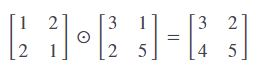

In [14]:
# Define tensors A1 and A23 as constants
A1 = constant([1, 2, 3, 4])
A23 = constant([[1, 2, 3], [1, 6, 4]])

# Define B1 and B23 to have the correct shape
B1 = np.ones_like(A1)
B23 = np.ones_like(A23)

# Perform element-wise multiplication
C1 = np.multiply(A1, B1)
C23 = np.multiply(A23, B23)

# Print the tensors C1 and C23
print('C1: {}'.format(C1))
print('C23: {}'.format(C23))

C1: [1 2 3 4]
C23: [[1 2 3]
 [1 6 4]]


# Making predictions with matrix multiplication
In later chapters, you will learn to train linear regression models. This process will yield a vector of parameters that can be multiplied by the input data to generate predictions. In this exercise, you will use input data, features, and a target vector, bill, which are taken from a credit card dataset we will use later in the course.

Define features, params, and bill as constants.
Compute the predicted value vector, billpred, by multiplying the input data, features, by the parameters, params. Use matrix multiplication, rather than the element-wise product.
Define error as the targets, bill, minus the predicted values, billpred.

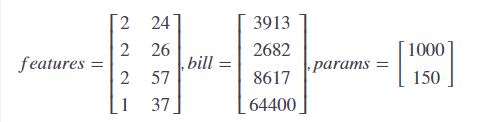

In [16]:
# Define features, params, and bill as constants
features = constant([[2, 24], [2, 26], [2, 57], [1, 37]])
params = constant([[1000], [150]])
bill = constant([[3913], [2682], [8617], [64400]])

# Compute billpred using features and params
billpred = np.matmul(features, params)

# Compute and print the error
error = bill - billpred
print(error)

tf.Tensor(
[[-1687]
 [-3218]
 [-1933]
 [57850]], shape=(4, 1), dtype=int32)


 # Summing over tensor dimensions
You've been given a matrix, wealth. This contains the value of bond and stock wealth for five individuals in thousands of dollars.


The first column corresponds to bonds and the second corresponds to stocks. Each row gives the bond and stock wealth for a single individual. Use wealth, reduce_sum(), and .numpy() to determine which statements are correct about wealth.

Combined, the 5 individuals hold $50,000 in bonds.

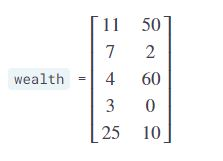

# Optimizing with gradients
You are given a loss function, y=x2, which you want to minimize. You can do this by computing the slope using the GradientTape() operation at different values of x. If the slope is positive, you can decrease the loss by lowering x. If it is negative, you can decrease it by increasing x. This is how gradient descent works.

The image shows a plot of y equals x squared. It also shows the gradient at x equals -1, x equals 0, and x equals 1.

In practice, you will use a high level tensorflow operation to perform gradient descent automatically. In this exercise, however, you will compute the slope at x values of -1, 1, and 0. The following operations are available: GradientTape(), multiply(), and Variable().

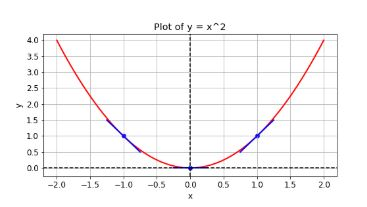

In [28]:
def compute_gradient(x0):
# Define x as a variable with an initial value of x0
    x = tf.Variable(x0)
    with tf.GradientTape() as tape:
        tape.watch(x)
        # Define y using the multiply operation
        y = tf.multiply(x, x)
    # Return the gradient of y with respect to x
    return tape.gradient(y, x).numpy()

# Compute and print gradients at x = -1, 1, and 0
print(compute_gradient(-1.0))
print(compute_gradient(1.0))
print(compute_gradient(0.0))

-2.0
2.0
0.0


# Import and convert data

In [3]:
import numpy as np
import pandas as pd

# read using pandas
house = pd.read_csv("house.csv")

# convert to numpy array
housing = np.array(house)

In [20]:
list(housing.columns)

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [4]:
# Import pandas under the alias pd
import pandas as pd

# Assign the path to a string variable named data_path
data_path = 'house.csv'

# Load the dataset as a dataframe named housing
housing = pd.read_csv(data_path)

# Print the price column of housing
print(housing['price'])

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64


In [7]:
# Import numpy and tensorflow with their standard aliases
import numpy as np
import tensorflow as tf

# Use a numpy array to define price as a 32-bit float
price = np.array(housing['price'], np.float32)

# Define waterfront as a Boolean using cast
waterfront = tf.cast(housing['waterfront'], tf.bool)

# Print price and waterfront
print(price)
print(waterfront)

[221900. 538000. 180000. ... 402101. 400000. 325000.]
tf.Tensor([False False False ... False False False], shape=(21613,), dtype=bool)


# Loss functions

In [8]:
# make predicitons for instructions purposes
predictions = price *.0002

In [9]:
# Import the keras module from tensorflow
from tensorflow import keras

# Compute the mean squared error (mse)
loss = keras.losses.mse(price, predictions)

# Print the mean squared error (mse)
print(loss.numpy())

426300740000.0


Take mae instead of mse loss now

In [10]:
# Compute the mean absolute error (mae)
loss = keras.losses.mae(price, predictions)

# Print the mean absolute error (mae)
print(loss.numpy())

539980.06


# Modify loss functions

The purpose of this is to construct a function of the trainable model variables that returns the loss. You can then repeatedly evaluate this function for different variable values until you find the minimum. In practice, you will pass this function to an optimizer in tensorflow. Note that features and targets have been defined and are available. Additionally, Variable, float32, and keras are available.<br>

Define a variable, scalar, with an initial value of 1.0 and a type of float32. <br>
Define a function called loss_function(), which takes scalar, features, and targets as arguments in that order.<br>
Use a mean absolute error loss function.

In [17]:
features=np.array([1., 2., 3., 4., 5.], dtype=np.float32)
targets= np.array([ 2.,  4.,  6.,  8., 10.], dtype=np.float32)

In [18]:
# Initialize a variable named scalar
scalar = tf.Variable(1.0, np.float32)

# Define the model
def model(scalar, features = features):
    return scalar * features

# Define a loss function
def loss_function(scalar, features = features, targets = targets):
    # Compute the predicted values
    predictions = model(scalar, features)
    
    # Return the mean absolute error loss
    return keras.losses.mae(targets, predictions)

# Evaluate the loss function and print the loss
print(loss_function(scalar).numpy())

3.0


# Linear Regression
Price = intercept + size * slope + error (univariate regression)

In [21]:
#Define target and feature
price = np.array(housing['price'], np.float32)
size = np.array(housing['sqft_living'], np.float32)

# define intercept and slope
intercept = tf.Variable(0.1, np.float32)
slope = tf.Variable(0.1, np.float32)

In [22]:
def linear_regression(intercept, slope, features = size):
    return intercept + features*slope

In [23]:
def loss_function(intercept,slope,targets = price, features=size):
    predictions = linear_regression(intercept,slope)
    return tf.keras.losses.mse(targets,predictions)

In [26]:
# This will change the intercept in a direction that will lower the value of the loss
opt = tf.keras.optimizers.Adam()

In [27]:
# Minimize the loss function and print the loss
for j in range(1000):
    opt.minimize(lambda: loss_function(intercept,slope),\
    var_list =[intercept,slope])
    print(loss_function(intercept, slope))

tf.Tensor(426196570000.0, shape=(), dtype=float32)
tf.Tensor(426193780000.0, shape=(), dtype=float32)
tf.Tensor(426191160000.0, shape=(), dtype=float32)
tf.Tensor(426188370000.0, shape=(), dtype=float32)
tf.Tensor(426185620000.0, shape=(), dtype=float32)
tf.Tensor(426182930000.0, shape=(), dtype=float32)
tf.Tensor(426180280000.0, shape=(), dtype=float32)
tf.Tensor(426177530000.0, shape=(), dtype=float32)
tf.Tensor(426174800000.0, shape=(), dtype=float32)
tf.Tensor(426172060000.0, shape=(), dtype=float32)
tf.Tensor(426169400000.0, shape=(), dtype=float32)
tf.Tensor(426166650000.0, shape=(), dtype=float32)
tf.Tensor(426163860000.0, shape=(), dtype=float32)
tf.Tensor(426161180000.0, shape=(), dtype=float32)
tf.Tensor(426158520000.0, shape=(), dtype=float32)
tf.Tensor(426155840000.0, shape=(), dtype=float32)
tf.Tensor(426153050000.0, shape=(), dtype=float32)
tf.Tensor(426150360000.0, shape=(), dtype=float32)
tf.Tensor(426147600000.0, shape=(), dtype=float32)
tf.Tensor(426144900000.0, shape

In [28]:
# Compute the loss for different slope and intercept values
print(loss_function(0.1, 0.1).numpy())
print(loss_function(0.1, 0.5).numpy())

426199300000.0
425112540000.0


# Train a linear model
In this exercise, we will pick up where the previous exercise ended. The intercept and slope, intercept and slope, have been defined and initialized. Additionally, a function has been defined, loss_function(intercept, slope), which computes the loss using the data and model variables.

You will now define an optimization operation as opt. You will then train a univariate linear model by minimizing the loss to find the optimal values of intercept and slope. Note that the opt operation will try to move closer to the optimum with each step, but will require many steps to find it. Thus, you must repeatedly execute the operation.<br>

Steps<br>
Initialize an Adam optimizer as opt with a learning rate of 0.5. <br>
Apply the .minimize() method to the optimizer.<br>
Pass loss_function() with the appropriate arguments as a lambda function to .minimize().<br>
Supply the list of variables that need to be updated to var_list.

In [31]:
# Initialize an adam optimizer
opt = keras.optimizers.Adam(0.5)

for j in range(100):
	# Apply minimize, pass the loss function, and supply the variables
	opt.minimize(lambda: loss_function(intercept, slope), var_list=[intercept, slope])

	# Print every 10th value of the loss
	if j % 10 == 0:
		print(loss_function(intercept, slope).numpy())

# Plot data and regression line
#plot_results(intercept, slope)

209896500000.0
201488740000.0
193386300000.0
185617430000.0
178196350000.0
171126400000.0
164403640000.0
158020580000.0
151967760000.0
146234930000.0


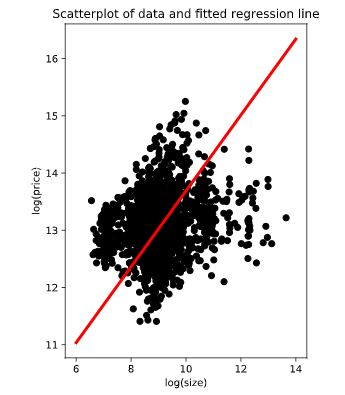

# Multiple linear regression
In most cases, performing a univariate linear regression will not yield a model that is useful for making accurate predictions. In this exercise, you will perform a multiple regression, which uses more than one feature.

You will use price_log as your target and size_log and bedrooms as your features. Each of these tensors has been defined and is available. You will also switch from using the the mean squared error loss to the mean absolute error loss: keras.losses.mae(). <br>
Finally, the predicted values are computed as follows: params[0] + feature1*params[1] + feature2*params[2]. <br>Note that we've defined a vector of parameters, params, as a variable, rather than using three variables.<br> Here, params[0] is the intercept and params[1] and params[2] are the slopes.

Steps <br>
Define a linear regression model that returns the predicted values.<br>
Set loss_function() to take the parameter vector as an input.<br>
Use the mean absolute error loss.<br>v
Complete the minimization operation.

In [41]:
bedrooms = np.array(housing['bedrooms'], np.float32)
size_log = np.log(np.array(housing['sqft_living'], np.float32))
price_log = np.log(np.array(housing['price'], np.float32))
params = np.array([0.1 , 0.05, 0.02], dtype=np.float32)
params = tf.Variable(params)

In [49]:
# Define the linear regression model
def linear_regression(params, feature1 = size_log, feature2 = bedrooms):
	return params[0] + feature1*params[1] + feature2*params[2]

# Define the loss function
def loss_function(params, targets = price_log, feature1 = size_log, feature2 = bedrooms):
	# Set the predicted values
	predictions = linear_regression(params, feature1, feature2)
  
	# Use the mean absolute error loss
	return keras.losses.mae(targets, predictions)

# Define the optimize operation
opt = keras.optimizers.Adam()

# Perform minimization and print trainable variables
for j in range(10):
	opt.minimize(lambda: loss_function(params), var_list=[params])
	print(params) # this comes out as loss intercept and slope [first loss .131, intercept .08, slop .05]

<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([0.13199994, 0.08199998, 0.05199996], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([0.13299993, 0.08299997, 0.05299995], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([0.13399993, 0.08399998, 0.05399995], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([0.13499993, 0.08499997, 0.05499995], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([0.13599993, 0.08599997, 0.05599995], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([0.13699993, 0.08699997, 0.05699995], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([0.13799994, 0.08799997, 0.05799995], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([0.13899994, 0.08899997, 0.05899995], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3,) dtype=float32, nump

# Training a linear model in batches
In this exercise, we will train a linear regression model in batches, starting where we left off in the previous exercise. We will do this by stepping through the dataset in batches and updating the model's variables, intercept and slope, after each step. This approach will allow us to train with datasets that are otherwise too large to hold in memory.

In [53]:
# Define the intercept and slope
intercept = tf.Variable(10.0, np.float32)
slope = tf.Variable(0.5, np.float32)

# Define the model
def linear_regression(intercept, slope, features):
	# Define the predicted values
	return intercept + features*slope

# Define the loss function
def loss_function(intercept, slope, targets, features):
	# Define the predicted values
	predictions = linear_regression(intercept, slope, features)
    
 	# Define the MSE loss
	return keras.losses.mse(targets, predictions)

In [54]:
# Initialize adam optimizer
opt = keras.optimizers.Adam()

# Load data in batches
for batch in pd.read_csv('house.csv', chunksize=100):
	size_batch = np.array(batch['sqft_lot'], np.float32)

	# Extract the price values for the current batch
	price_batch = np.array(batch['price'], np.float32)

	# Complete the loss, fill in the variable list, and minimize
	opt.minimize(lambda: loss_function(intercept, slope, price_batch, size_batch), var_list=[intercept, slope])

# Print trained parameters
print(intercept.numpy(), slope.numpy())

10.217888 0.7016
